In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ureditev as u

V tej nalogi je moj namen analizirati predstave, ki se izvajajo na odrih ulice Broadway, predstave po ostalih zveznih državah Združenih držav Amerike in Londona.

In [30]:
#BROADWAY
#Trenutno se izvajajo te predstave:
broadway_trenutno = u.broadway[u.broadway['time'].str.contains(r'\d{10}')]

#Napovedane so te predstave:
broadway_prihodnje = u.broadway[u.broadway['time'].str.contains(r'2018-2019')]
#Najpopularnejše gledališče:
u.broadway.venue.describe()
u.broadway[u.broadway.venue.str.contains('American Airlines Theatre')]

broadway_trenutno.head()
broadway_prihodnje.head()
u.broadway[u.broadway.venue.str.contains('American Airlines Theatre')]

,time,show,venue,genre,location,type
1,2018-2019,All My Sons,American Airlines Theatre,Play,"New York, NY",Broadway
8,2018-2019,Bernhardt/Hamlet,American Airlines Theatre,Play,"New York, NY",Broadway
45,2018-2019,True West,American Airlines Theatre,Play,"New York, NY",Broadway


Trenutno se na Broadwayu izvaja 11 predstav, za naslednje leto pa jih je napovedanih 26. Najpopularnejše gledališče je american Airlines Theatre, v katerem se v sezoni 2018-2019 izvajajo 3 predstave.

Spodnja tabela in grafi prikazujejo podatke o predstavah na Broadway odru od leta 1984. Stoplci po vrsti prikazujejo bruto dobiček v milijonih ameriških dolarjev, število obiskovalcev v milijonih, sama produktivnost predstav in število novih predstav v vsakem letu. Produktivnost predstav se meri v tednih, predstavlja vsoto vseh tednov, kadar so se predstave izvajale. Kot pričakovano dobiček in število obiskovalcev skozi leta narašča, medtem ko graf produktivnost in število novih predstav nima posebnih značilnosti.

,year,gross,attendance,duration,newProductions
0,2017,1697,13.79,1624,33
1,2016,1449,13.27,1580,45
2,2015,1373,13.32,1648,39
3,2014,1365,13.10,1626,37
4,2013,1269,12.21,1496,44


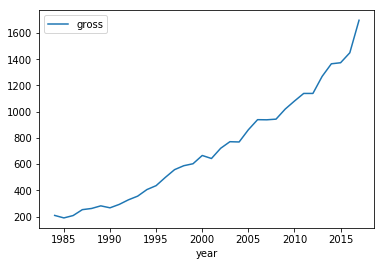

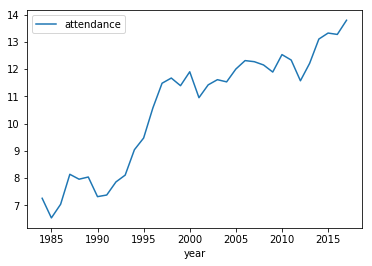

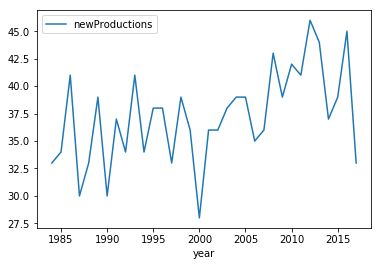

In [3]:
#dobiček
bdobicek = u.broadway_statistika.plot(kind = 'line', x = 'year', y = 'gross')
#prisotnost
bprisotnost = u.broadway_statistika.plot(kind = 'line', x = 'year', y = 'attendance')
#nove produkcije
bnovo = u.broadway_statistika.plot(kind = 'line', x = 'year', y = 'newProductions')
#produktivnost
#bduration = u.broadway_statistika.plot(kind = 'line', x = 'year', y = 'duration')
u.broadway_statistika.head()

Spodnja tabela in grafi prikazujejo enake karakteristike kot zgornja, le da tu opazujemo predstave po celotni državi ZDA.

,year,gross,attendance,duration
0,2017,1416,17.0,"1,125"
1,2016,1007,13.9,983
2,2015,981,14.0,"1,014"
3,2014,957,13.7,953
4,2013,933,13.9,994


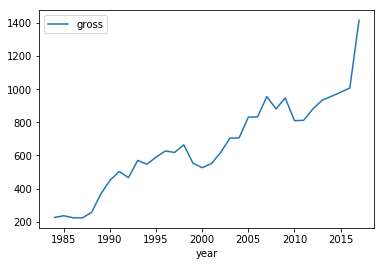

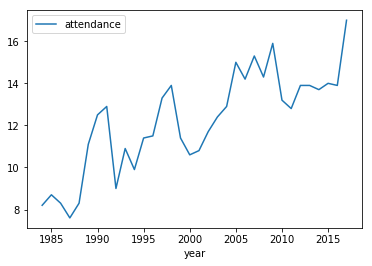

In [28]:
#dobiček
rdobicek = u.regional_statistika.plot(kind = 'line', x = 'year', y = 'gross')
#prisotnost
rprisotnost = u.regional_statistika.plot(kind = 'line', x = 'year', y = 'attendance')
u.regional_statistika.head()

Poglejmo si natančnejše podatke o predstavah od leta 1800 naprej. Spodnji graf prikazuje število izvedb vseh predstav vsakega leta.

,show,type,genre,performances,o_year,o_month,c_year,c_month,duration
0,It's a Bird...It's a Plane...It's Superman,Original,"Musical, Comedy",129,1966,Mar,1966,Jul,0
1,MASTER HAROLD and the boys,Original,"Play, Drama",344,1982,May,1983,Feb,1
2,MASTER HAROLD and the boys,Revival,"Play, Drama",49,2003,Jun,2003,Jul,0
3,Tone Pictures and The White Peacock,Original,"Special, Ballet",31,1927,Apr,1927,May,0
5,'Lijah,Original,Play,1,1928,May,1928,May,0


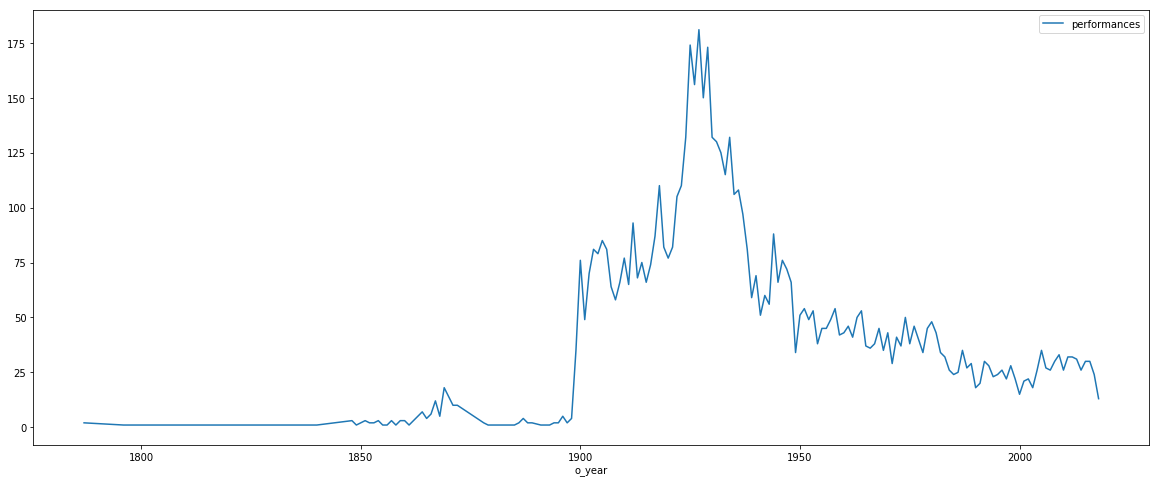

In [26]:
u.vsi['duration'] = u.vsi.c_year-u.vsi.o_year
nastopi = u.vsi[['o_year', 'performances']]
nastopi = nastopi.groupby(['o_year']).count()
gnastopi = nastopi.plot(kind = 'line', figsize=(20, 8))
tipi = u.vsi[['o_year', 'type']]
u.vsi.head()

Predstave se predvajajo različno dolgo, odvisno od priljubljenosti. Spodnji graf prikazuje število let, v katerih se bo še predvajala najuspešnejša predstava vsakega leta.

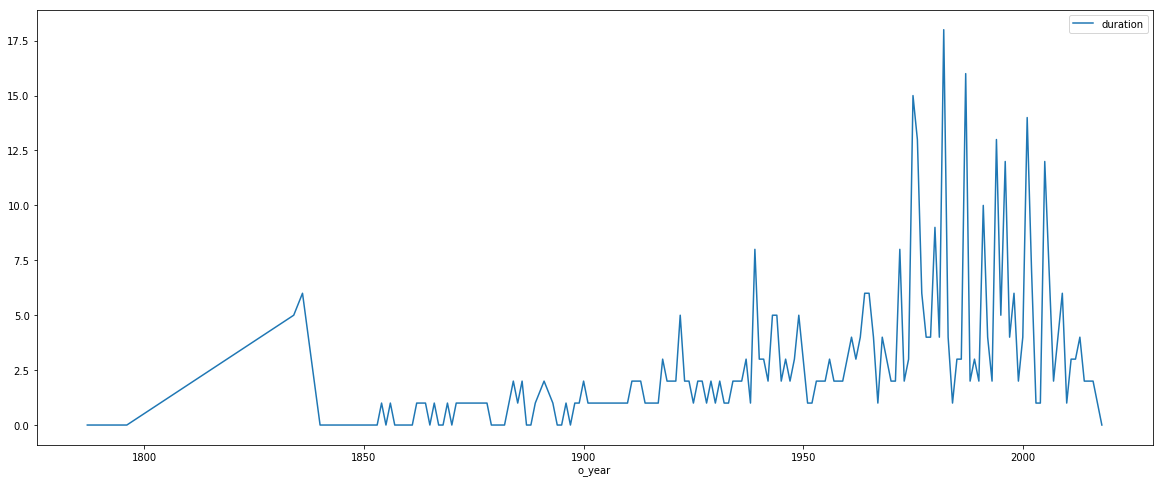

In [25]:
dolzine = u.vsi[['o_year', 'duration']]
dolzine = dolzine.groupby(['o_year']).max()
gdolzine = dolzine.plot(kind = 'line', figsize=(20, 8))

Poglejmo še mesece, v katerih se pogosto začenjajo predstave. Pričakujemo, da bodo meseci, v katerih se je začelo največ predstav, meseci proti koncu leta, saj predstave, ki se začnejo prevajati proti koncu leta pričakujejo večji obisk zaradi božičnih praznikov. V začetku februarja izidejo tudi nominacije za najprestižnejše nagrade v gledališkem krogu (Tony awards), kjer so največkrat nagrajene predstave, ki so se začele po poletju.

o_month
Jan    651
Feb    610
Mar    644
Apr    758
May    531
Jun    238
Jul    108
Aug    290
Sep    702
Oct    962
Nov    870
Dec    768
Name: o_month, dtype: int64


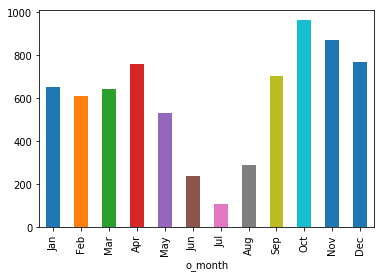

In [22]:
mesec = u.vsi[['o_month']]
meseci = mesec.groupby('o_month')['o_month'].count()
meseci = meseci.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

print(meseci)
gmeseci = meseci.plot(kind = 'bar')

Poleg glavnega odra v New Yorku, se v Združenih državah Amerike pogosto tudi po ostalih zveznih državah. Spodnji zemljevid prikazuje število predstav, ki se izvajajo v sezoni 2018-2019 po zveznih državah ZDA.

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import zemljevid
zemljevid.m

Po zveznih državah je bila najpogosteje izvajana predstava *Finding Neverland*.

In [29]:
u.regional.describe()

,time,show,venue,genre,location,type
count,2063,2063,2063,2035,2063,2051
unique,9,668,566,62,337,2
top,2018-2019,Finding Neverland,Orpheum Theatre,Musical,"Chicago, IL",Regional/ National Tours
freq,1842,81,17,1230,60,2050


### Zaključek

Kot pričakovano sam dobiček predstav na vseh odrih po Združenih država narašča, medtem ko obisk predstav lahko kakšno leto upade. Največ predstav na odru Broadway se je izvajalo v tridesetih letih prejšnjega stoletja, od takrat pa število novih predstav upada. Največ predstav izven New Yorka pa se izvaja v zvezni državi *California*.